# Linear Discriminant Analysis - Demonstration
## With dimensionality reduction

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from LinearDiscriminantAnalysis import LinearDiscriminantAnalysis

In [2]:
# Configuration:
np.set_printoptions(precision=4, suppress=True)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# Dataset:
digits = load_digits(as_frame=True)
digits.frame['target'] = digits.target

In [4]:
# Function for displaying part of the dataset:
def print_digits(X, y=None, title=None):
    fig = plt.figure(figsize=(8, 8))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    
    n_samples = X.shape[0]
    images = X.reshape(-1, 8, 8)
    for i in range(min(n_samples, 12 * 12)):
        ax = fig.add_subplot(12, 12, i + 1, xticks=[], yticks=[])
        ax.imshow(images[i], cmap=plt.cm.binary, interpolation='nearest')
        if y is not None:
            ax.text(0, 7, str(y[i]))
    
    fig.suptitle(title, y=1.08, fontsize=22)

In [5]:
X = digits.data.to_numpy()
y = digits.target.to_numpy()

X.shape, y.shape

((1797, 64), (1797,))

In [6]:
# Number of dimensions to preserve:

n_dimensions = 5

## PCA Transformation
This is the pairplot of the first 8 dimensions of the Digits dataset from Sci-Kit Learn after applying PCA.

In [7]:
pca = PCA(random_state=42, n_components=n_dimensions)
X_pca = pca.fit_transform(X)

X_pca.shape

(1797, 5)

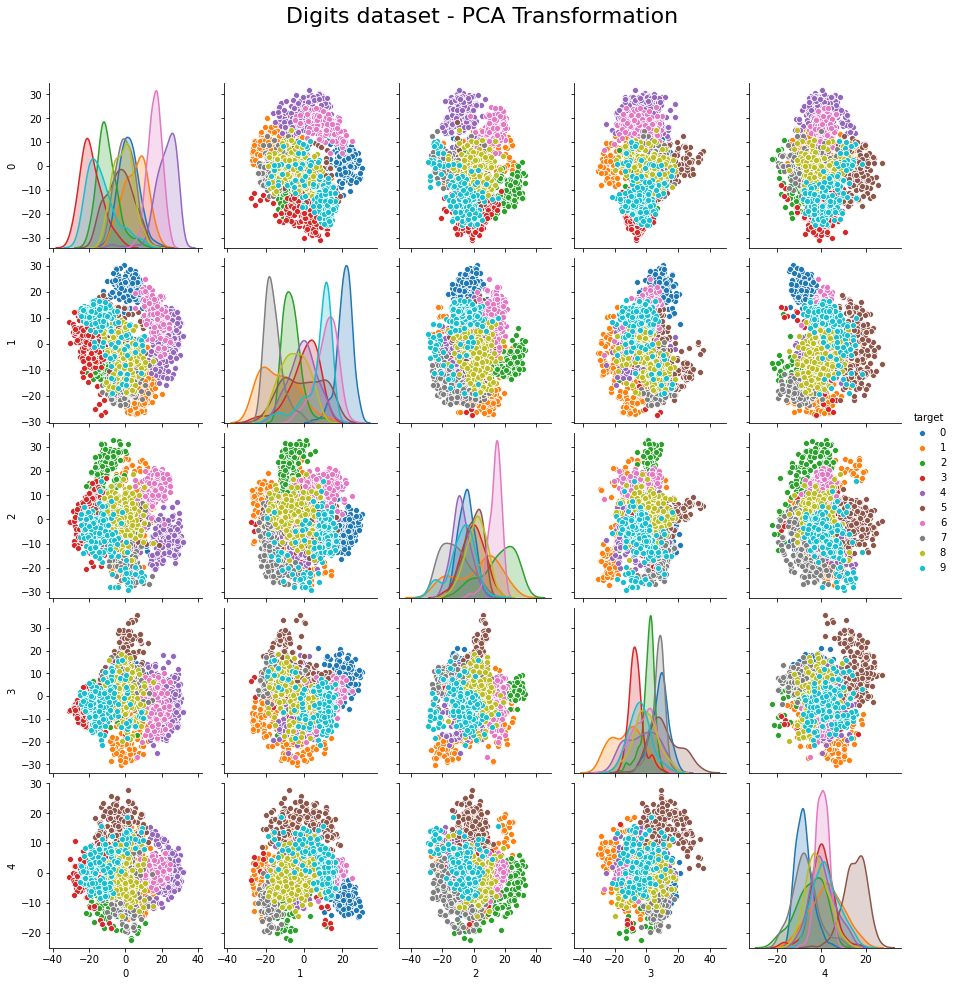

In [8]:
digits_pca = pd.DataFrame.from_records(X_pca[:, :8])
digits_pca['target'] = y
g = sns.pairplot(digits_pca, hue="target")
g.fig.suptitle(f"Digits dataset - PCA Transformation", y=1.08, fontsize=22);

In [9]:
X_pca_inv = pca.inverse_transform(X_pca)

X_pca_inv.shape

(1797, 64)

## LDA Transformation (without intra-class clustering)
This is the pairplot of the first 8 dimensions of the Digits dataset from Sci-Kit Learn after applying LDA.

In [10]:
lda = LinearDiscriminantAnalysis(random_state=42, n_components=n_dimensions)
X_lda = lda.fit_transform(X, y, class_clustering=False, verbose=True)

X_lda.shape

Targets were provided: using the labeled data.

Mu:
[[ 0.      0.3038  5.2048 11.8358 11.8481  5.7819  1.3623  0.1297  0.0056
   1.9939 10.3823 11.9794 10.2794  8.1758  1.8464  0.108   0.0028  2.6016
   9.9032  6.9928  7.0979  7.8063  1.7885  0.0501  0.0011  2.4697  9.0913
   8.8214  9.9271  7.5515  2.3178  0.0022  0.      2.3395  7.6672  9.0718
  10.3016  8.744   2.9093  0.      0.0089  1.5838  6.8815  7.2282  7.6722
   8.2365  3.4563  0.0273  0.0072  0.7045  7.507   9.5392  9.4162  8.7585
   3.7251  0.2065  0.0006  0.2794  5.5576 12.089  11.8091  6.7641  2.0679
   0.3645]]

Mu_c[0]:
[ 0.      0.0225  4.1854 13.0955 11.2978  2.927   0.0337  0.      0.
  0.8876 12.5787 13.3708 11.4944 11.3764  0.9663  0.      0.      3.7303
 14.2753  5.264   2.1011 12.1685  3.5225  0.      0.      5.2921 12.7135
  1.9944  0.1404  9.0618  6.4494  0.      0.      5.8708 11.5562  0.8933
  0.0449  8.7753  7.1236  0.      0.      3.4944 13.2865  1.6517  1.5337
 11.309   5.8539  0.      0.      0.7978 13.056

(1797, 5)

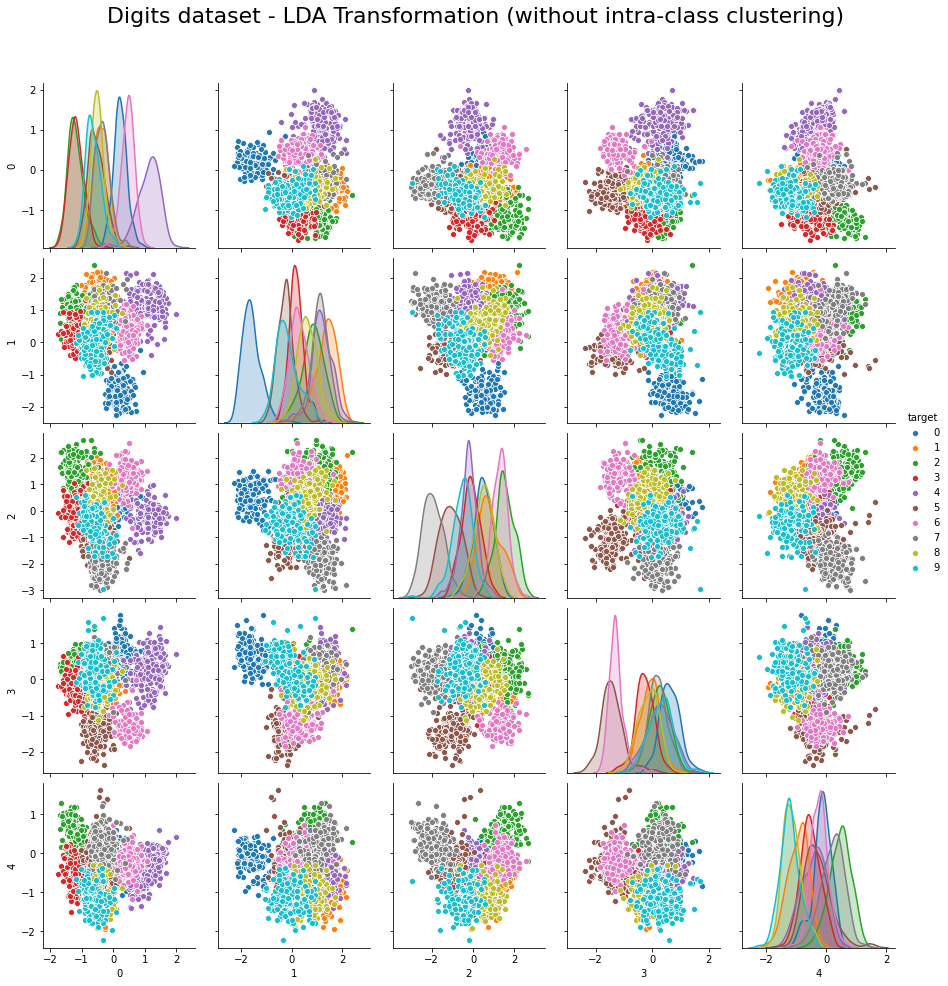

In [11]:
digits_lda = pd.DataFrame.from_records(X_lda[:, :8])
digits_lda['target'] = y
g = sns.pairplot(digits_lda, hue="target")
g.fig.suptitle(f"Digits dataset - LDA Transformation (without intra-class clustering)", y=1.08, fontsize=22);

In [12]:
X_lda_inv = lda.inverse_transform(X_lda, verbose=True)

X_lda_inv.shape

Reverse tranformation after dimensionality reduction may yield unexpected results: 5 dim. -> 64 dim.


(1797, 64)

## LDA Transformation (with intra-class clustering)
This is the pairplot of the first 8 dimensions of the Digits dataset from Sci-Kit Learn after applying LDA.

In [13]:
ldacc = LinearDiscriminantAnalysis(random_state=42, n_components=n_dimensions)
X_ldacc = ldacc.fit_transform(X, y, min_clusters=1, max_clusters=2, class_clustering=True, verbose=True)

X_ldacc.shape

No target is provided: using unsupervised clustering.

Searching for an optimal number of clusters within class 0 for values between 1 and 2...

1 clusters: 	AIC: 53231.447, 	BIC: 53438.263  
2 clusters: 	AIC: 51803.702, 	BIC: 52220.516  
Optimal number of clusters for class 0 found: 2

No target is provided: using unsupervised clustering.

Searching for an optimal number of clusters within class 1 for values between 1 and 2...

1 clusters: 	AIC: 64491.608, 	BIC: 64699.869  
2 clusters: 	AIC: 60222.857, 	BIC: 60642.582  
Optimal number of clusters for class 1 found: 2

No target is provided: using unsupervised clustering.

Searching for an optimal number of clusters within class 2 for values between 1 and 2...

1 clusters: 	AIC: 60176.034, 	BIC: 60382.483  
2 clusters: 	AIC: 57586.707, 	BIC: 58002.782  
Optimal number of clusters for class 2 found: 2

No target is provided: using unsupervised clustering.

Searching for an optimal number of clusters within class 3 for values between 1 a

(1797, 5)

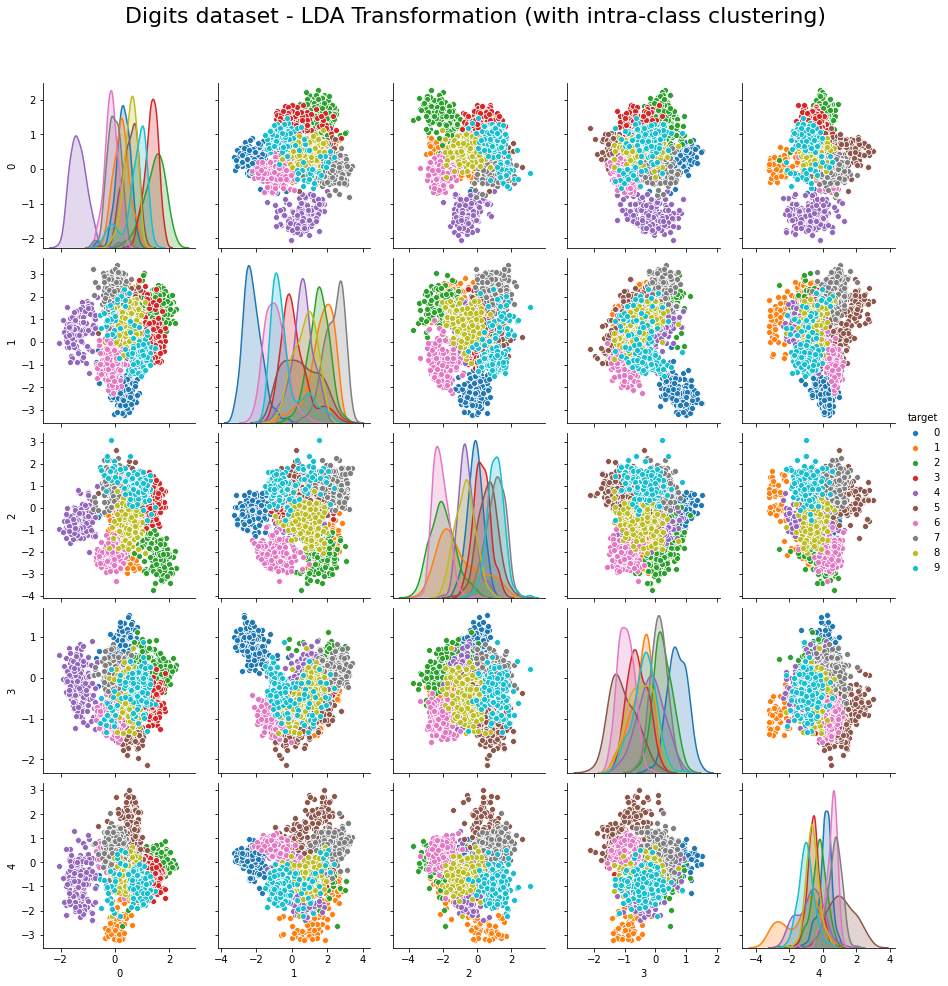

In [14]:
digits_ldacc = pd.DataFrame.from_records(X_ldacc[:, :8])
digits_ldacc['target'] = y
g = sns.pairplot(digits_ldacc, hue="target")
g.fig.suptitle(f"Digits dataset - LDA Transformation (with intra-class clustering)", y=1.08, fontsize=22);

In [15]:
X_ldacc_inv = ldacc.inverse_transform(X_ldacc, verbose=True)

X_ldacc_inv.shape

Reverse tranformation after dimensionality reduction may yield unexpected results: 5 dim. -> 64 dim.


(1797, 64)

## Unsupervised LDA Transformation
This is the pairplot of the first 8 dimensions of the Digits dataset from Sci-Kit Learn after applying Unsupervised LDA.

In [16]:
ulda = LinearDiscriminantAnalysis(random_state=42, n_components=n_dimensions)
X_ulda = ulda.fit_transform(X, min_clusters=110, max_clusters=125, verbose=True)

X_ulda.shape

No target is provided: using unsupervised clustering.

Predicting the classes from the clusters...

Searching for an optimal number of clusters between 110 and 125...

110 clusters: 	AIC: 533958.844, 	BIC: 573838.875  
111 clusters: 	AIC: 533704.735, 	BIC: 573947.361  
112 clusters: 	AIC: 533516.892, 	BIC: 574122.114  
113 clusters: 	AIC: 533022.140, 	BIC: 573989.958  
114 clusters: 	AIC: 532751.955, 	BIC: 574082.369  
115 clusters: 	AIC: 532586.833, 	BIC: 574279.842  
116 clusters: 	AIC: 532536.772, 	BIC: 574592.377  
117 clusters: 	AIC: 532365.849, 	BIC: 574784.049  
118 clusters: 	AIC: 532069.954, 	BIC: 574850.750  
119 clusters: 	AIC: 532005.135, 	BIC: 575148.527  
120 clusters: 	AIC: 531763.745, 	BIC: 575269.732  
121 clusters: 	AIC: 531633.487, 	BIC: 575502.070  
122 clusters: 	AIC: 531491.122, 	BIC: 575722.300  
123 clusters: 	AIC: 531310.945, 	BIC: 575904.719  
124 clusters: 	AIC: 530957.038, 	BIC: 575913.408  
125 clusters: 	AIC: 531089.074, 	BIC: 576408.040  
Optimal number o

(1797, 5)

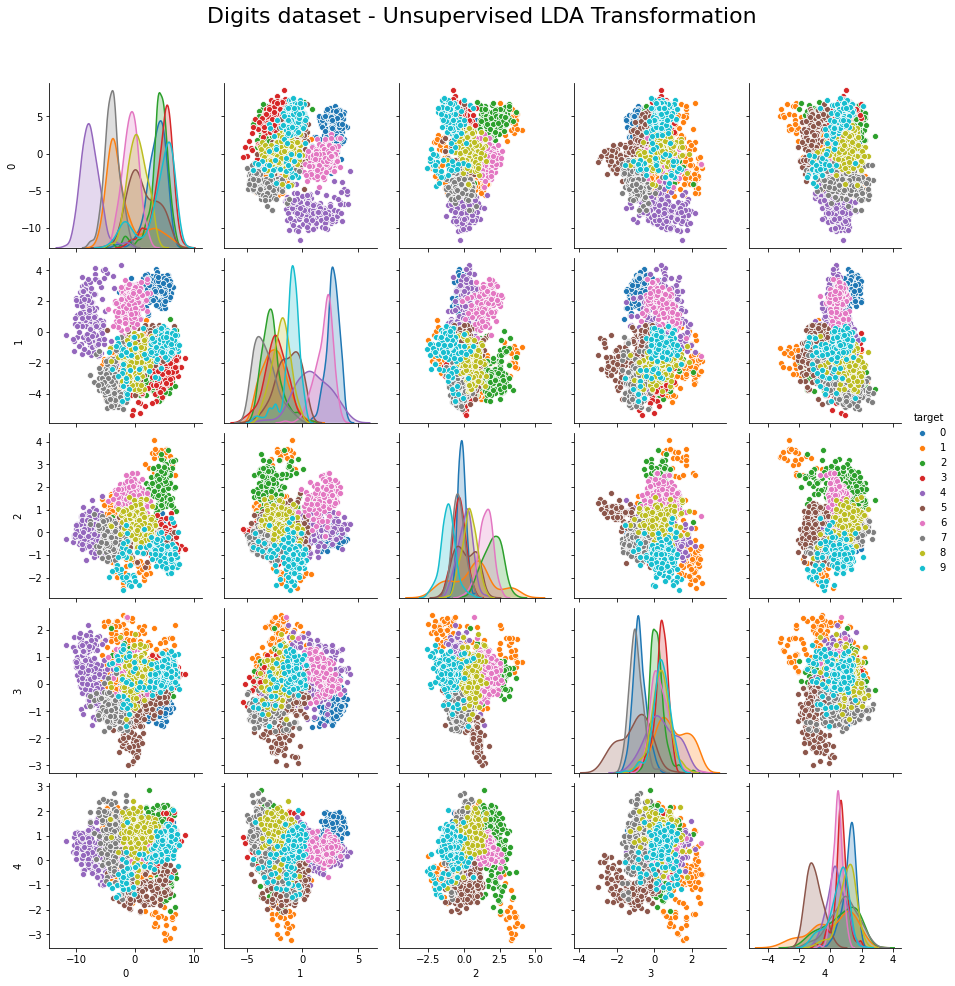

In [17]:
digits_ulda = pd.DataFrame.from_records(X_ulda[:, :8])
digits_ulda['target'] = y
g = sns.pairplot(digits_ulda, hue="target")
g.fig.suptitle(f"Digits dataset - Unsupervised LDA Transformation", y=1.08, fontsize=22);

In [18]:
X_ulda_inv = ulda.inverse_transform(X_ulda, verbose=True)

X_ulda_inv.shape

Reverse tranformation after dimensionality reduction may yield unexpected results: 5 dim. -> 64 dim.


(1797, 64)

## Comparison of the inverse transformation

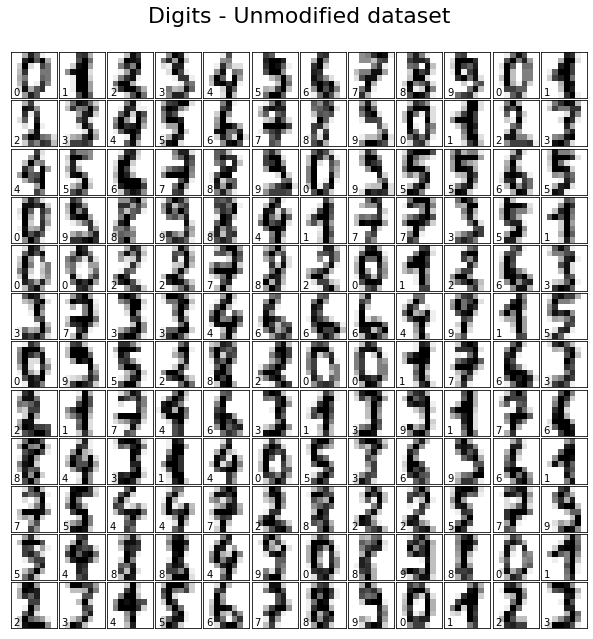

In [19]:
print_digits(X, y, title="Digits - Unmodified dataset")

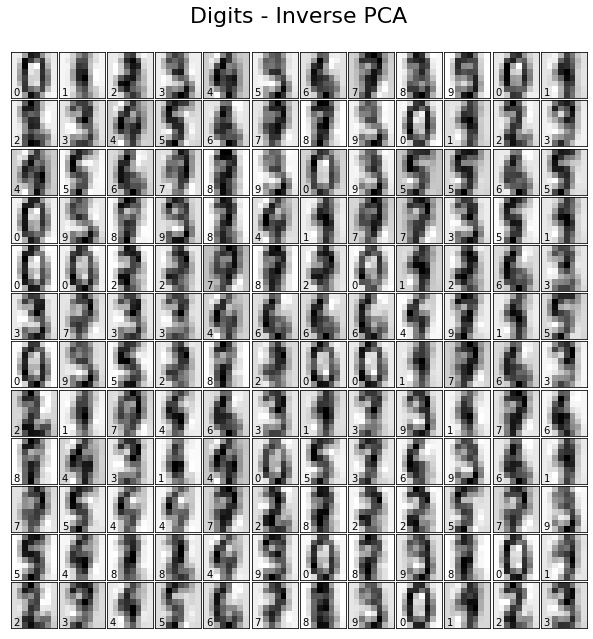

In [20]:
print_digits(X_pca_inv, y, title="Digits - Inverse PCA")

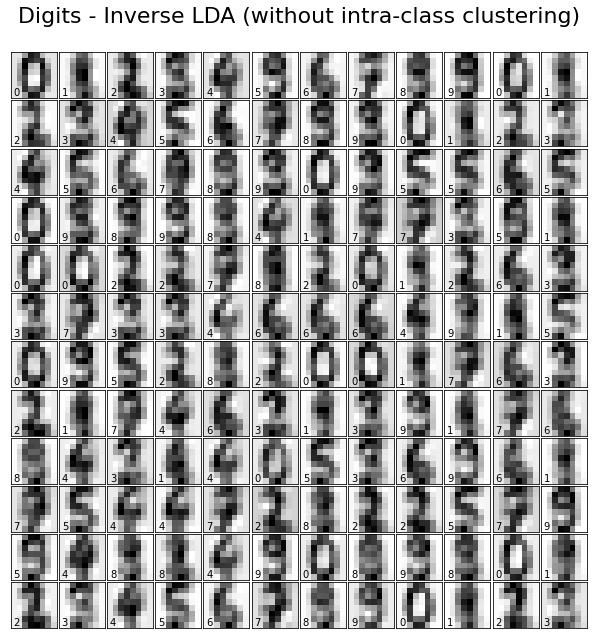

In [21]:
print_digits(X_lda_inv, y, title="Digits - Inverse LDA (without intra-class clustering)")

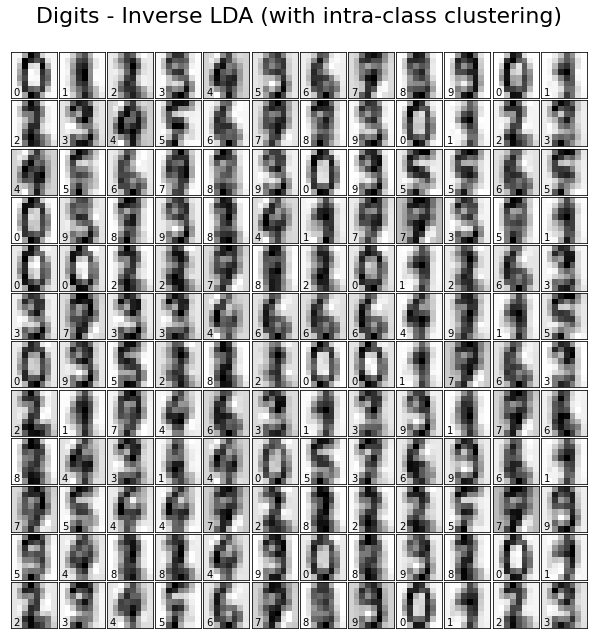

In [22]:
print_digits(X_ldacc_inv, y, title="Digits - Inverse LDA (with intra-class clustering)")

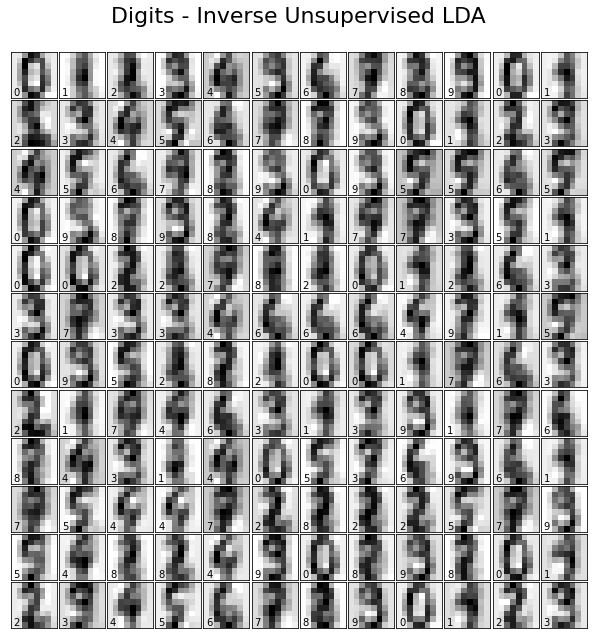

In [23]:
print_digits(X_ulda_inv, y, title="Digits - Inverse Unsupervised LDA")

## Comparison on different classifiers

In [24]:
gnb = GaussianNB()
res_original = np.mean(cross_val_score(gnb, X, y, cv=5, scoring='accuracy'))
res_pca = np.mean(cross_val_score(gnb, X_pca, y, cv=5, scoring='accuracy'))
res_lda = np.mean(cross_val_score(gnb, X_lda, y, cv=5, scoring='accuracy'))
res_ldacc = np.mean(cross_val_score(gnb, X_ldacc, y, cv=5, scoring='accuracy'))
res_ulda = np.mean(cross_val_score(gnb, X_ulda, y, cv=5, scoring='accuracy'))
print(f"Prediction score with Naive Bayes:\n"
      f" - Original dataset                       : {res_original:.2%}\n"
      f" - PCA transformation                     : {res_pca:.2%}\n"
      f" - LDA transformation (w/o clustering)    : {res_lda:.2%}\n"
      f" - LDA transformation (w/ clustering)     : {res_ldacc:.2%}\n"
      f" - Unsupervised LDA transformation        : {res_ulda:.2%}\n")

Prediction score with Naive Bayes:
 - Original dataset                       : 80.69%
 - PCA transformation                     : 81.91%
 - LDA transformation (w/o clustering)    : 92.54%
 - LDA transformation (w/ clustering)     : 90.98%
 - Unsupervised LDA transformation        : 86.64%



In [25]:
dtc = DecisionTreeClassifier(max_depth=9, random_state=42)
res_original = np.mean(cross_val_score(dtc, X, y, cv=5, scoring='accuracy'))
res_pca = np.mean(cross_val_score(dtc, X_pca, y, cv=5, scoring='accuracy'))
res_lda = np.mean(cross_val_score(dtc, X_lda, y, cv=5, scoring='accuracy'))
res_ldacc = np.mean(cross_val_score(dtc, X_ldacc, y, cv=5, scoring='accuracy'))
res_ulda = np.mean(cross_val_score(dtc, X_ulda, y, cv=5, scoring='accuracy'))
print(f"Prediction score with a Decision Tree Classifier:\n"
      f" - Original dataset                       : {res_original:.2%}\n"
      f" - PCA transformation                     : {res_pca:.2%}\n"
      f" - LDA transformation (w/o clustering)    : {res_lda:.2%}\n"
      f" - LDA transformation (w/ clustering)     : {res_ldacc:.2%}\n"
      f" - Unsupervised LDA transformation        : {res_ulda:.2%}\n")

Prediction score with a Decision Tree Classifier:
 - Original dataset                       : 78.41%
 - PCA transformation                     : 78.69%
 - LDA transformation (w/o clustering)    : 86.03%
 - LDA transformation (w/ clustering)     : 87.98%
 - Unsupervised LDA transformation        : 84.75%



In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='tanh', max_iter=250, alpha=0.01, solver='sgd', 
                    verbose=False, random_state=42, learning_rate_init=.01)
res_original = np.mean(cross_val_score(mlp, X, y, cv=5, scoring='accuracy'))
res_pca = np.mean(cross_val_score(mlp, X_pca, y, cv=5, scoring='accuracy'))
res_lda = np.mean(cross_val_score(mlp, X_lda, y, cv=5, scoring='accuracy'))
res_ldacc = np.mean(cross_val_score(mlp, X_ldacc, y, cv=5, scoring='accuracy'))
res_ulda = np.mean(cross_val_score(mlp, X_ulda, y, cv=5, scoring='accuracy'))
print(f"Prediction score with a Multilayer Perceptron Classifier:\n"
      f" - Original dataset                       : {res_original:.2%}\n"
      f" - PCA transformation                     : {res_pca:.2%}\n"
      f" - LDA transformation (w/o clustering)    : {res_lda:.2%}\n"
      f" - LDA transformation (w/ clustering)     : {res_ldacc:.2%}\n"
      f" - Unsupervised LDA transformation        : {res_ulda:.2%}\n")

Prediction score with a Multilayer Perceptron Classifier:
 - Original dataset                       : 93.82%
 - PCA transformation                     : 83.86%
 - LDA transformation (w/o clustering)    : 92.21%
 - LDA transformation (w/ clustering)     : 93.54%
 - Unsupervised LDA transformation        : 90.48%



## Visualization of the centroids

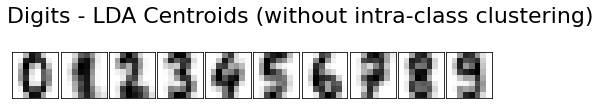

In [27]:
print_digits(lda.mu_c_, title="Digits - LDA Centroids (without intra-class clustering)")

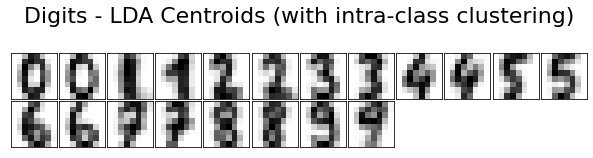

In [28]:
print_digits(ldacc.mu_c_, title="Digits - LDA Centroids (with intra-class clustering)")

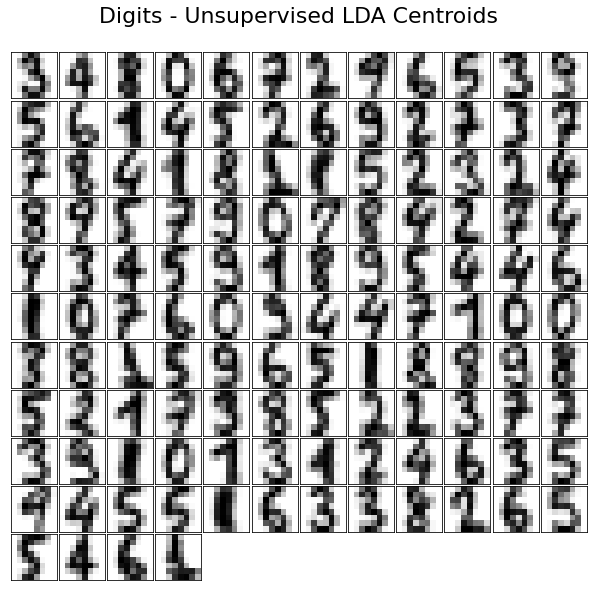

In [29]:
print_digits(ulda.mu_c_, title="Digits - Unsupervised LDA Centroids")